# Plots of Decision Boundaries for Presentation

This file contains code for plotting plots with decision boundaries for multiple models in one plot using the same image for comparison.

In [1]:
import jupyter_black
import torch
import numpy as np

from data_generators import data_loader_MNIST, data_loader_CIFAR10, data_loader_CIFAR100
from plotting_tools import (
    plot_decision_boundaries_for_multiple_models,
    generate_random_vectors,
    get_random_img,
)
from tools import ModelInfo

jupyter_black.load()

In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load data
train_loader_MNIST, test_loader_MNIST = data_loader_MNIST()
train_loader_CIFAR10, test_loader_CIFAR10 = data_loader_CIFAR10()
train_loader_CIFAR100, test_loader_CIFAR100 = data_loader_CIFAR100()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Set seeds for reproducibility
seed_value = 42
torch.manual_seed(seed_value)
np.random.seed(seed_value)

# If you're using CUDA, also set this for reproducibility
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)  # if you are using multi-GPU.
    torch.backends.cudnn.deterministic = True  # Necessary for reproducibility
    torch.backends.cudnn.benchmark = False  # Can affect performance

In [4]:
# Load models
model_names_set = [
    "model_no_reg",
    "model_no_reg_no_dropout",
    "model_l2",
    "model_jacobi",
    "model_jacobi_no_dropout",
    "model_svb",
]
model_names = []

for i in range(5):
    for name in model_names_set:
        model_names.append(f"{name}_{i}")

models_MNIST = {name: ModelInfo(name, "mnist") for name in model_names}
models_CIFAR10 = {name: ModelInfo(name, "cifar10") for name in model_names}

model_names_set_CIFAR100 = [
    "model_no_reg",
    "model_l2",
    "model_jacobi",
    "model_svb",
]
model_names_CIFAR100 = []

for i in range(5):
    for name in model_names_set_CIFAR100:
        model_names_CIFAR100.append(f"{name}_{i}")

models_CIFAR100 = {name: ModelInfo(name, "cifar100") for name in model_names_CIFAR100}

c:\ProgramData\Anaconda3\envs\bioai\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\bioai\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


c:\ProgramData\Anaconda3\envs\bioai\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
6it [00:11,  1.96s/it]


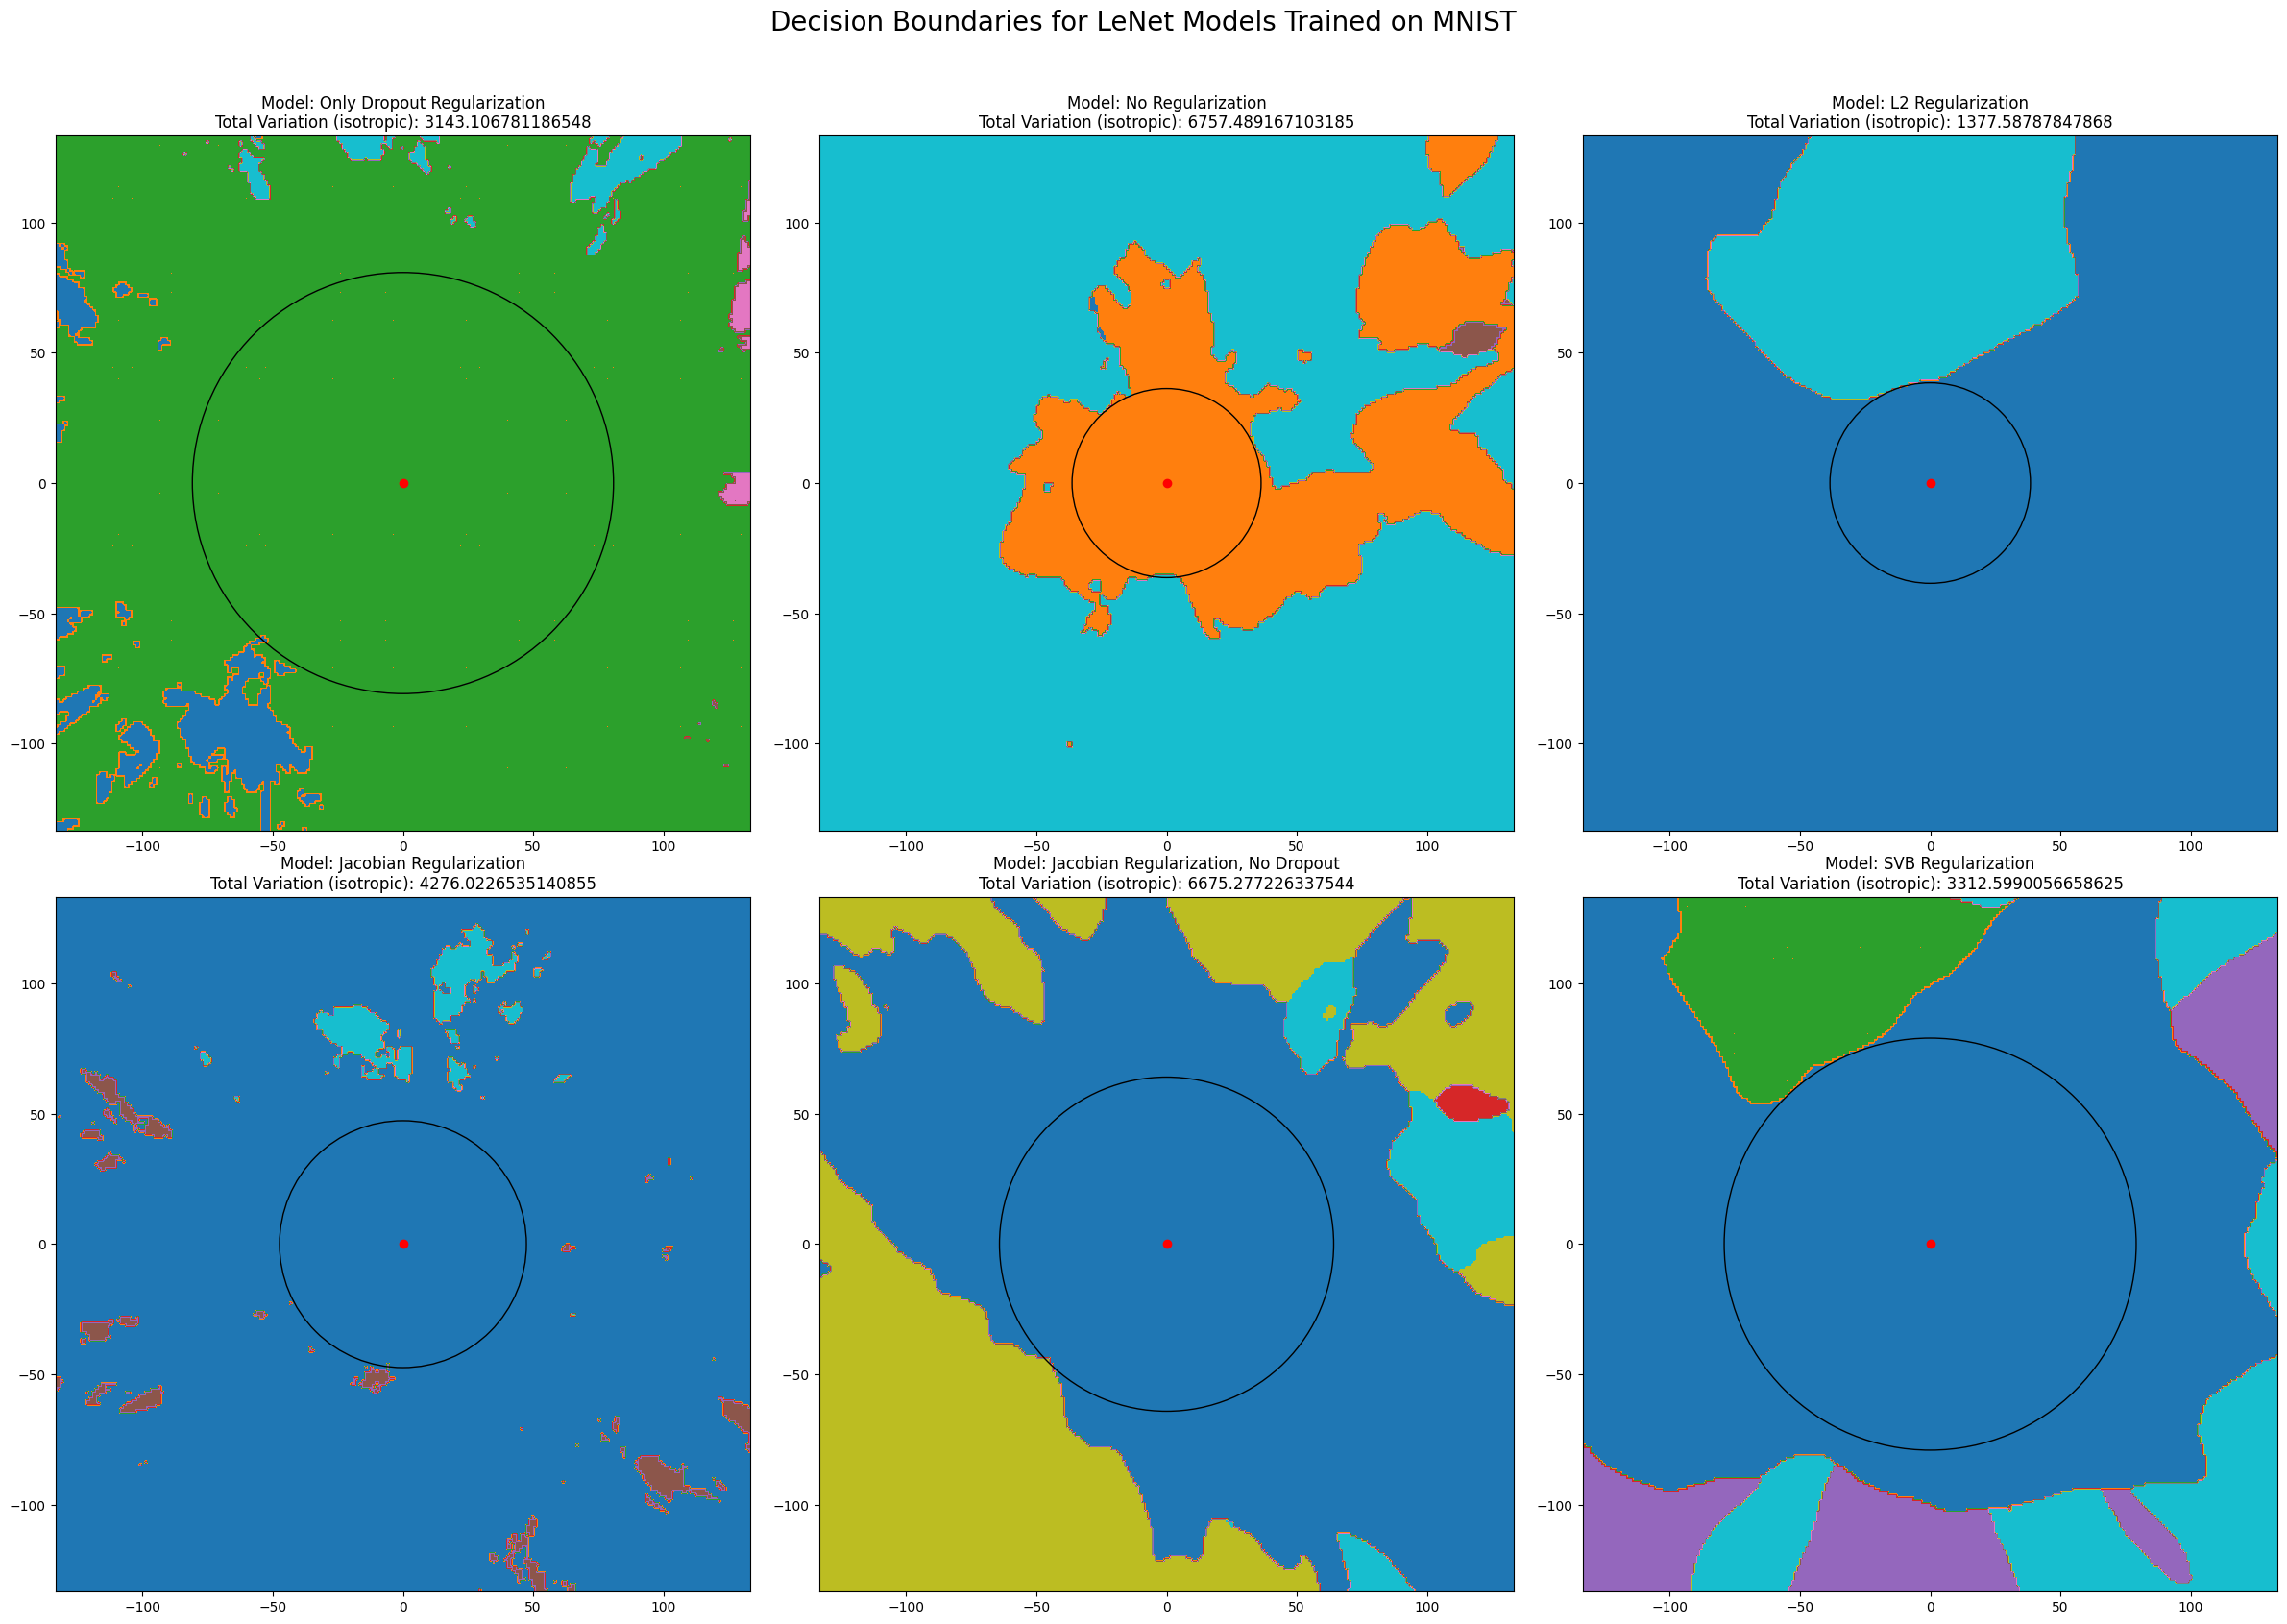

In [5]:
# Plot decision boundaries for MNIST/LeNet models
models_mnist_with_names = [
    (models_MNIST[f"model_no_reg_2"].model, "Only Dropout Regularization"),
    (models_MNIST[f"model_no_reg_no_dropout_2"].model, "No Regularization"),
    (models_MNIST[f"model_l2_2"].model, "L2 Regularization"),
    (models_MNIST[f"model_jacobi_2"].model, "Jacobian Regularization"),
    (
        models_MNIST[f"model_jacobi_no_dropout_2"].model,
        "Jacobian Regularization, No Dropout",
    ),
    (models_MNIST[f"model_svb_2"].model, "SVB Regularization"),
]
image = get_random_img(test_loader_MNIST)
v1, v2 = generate_random_vectors(image)
plot_decision_boundaries_for_multiple_models(
    models_mnist_with_names,
    "mnist",
    image,
    v1,
    v2,
    device,
    resolution=250,
    zoom=0.0075,
    title="Decision Boundaries for LeNet Models Trained on MNIST",
)

5it [01:50, 22.09s/it]


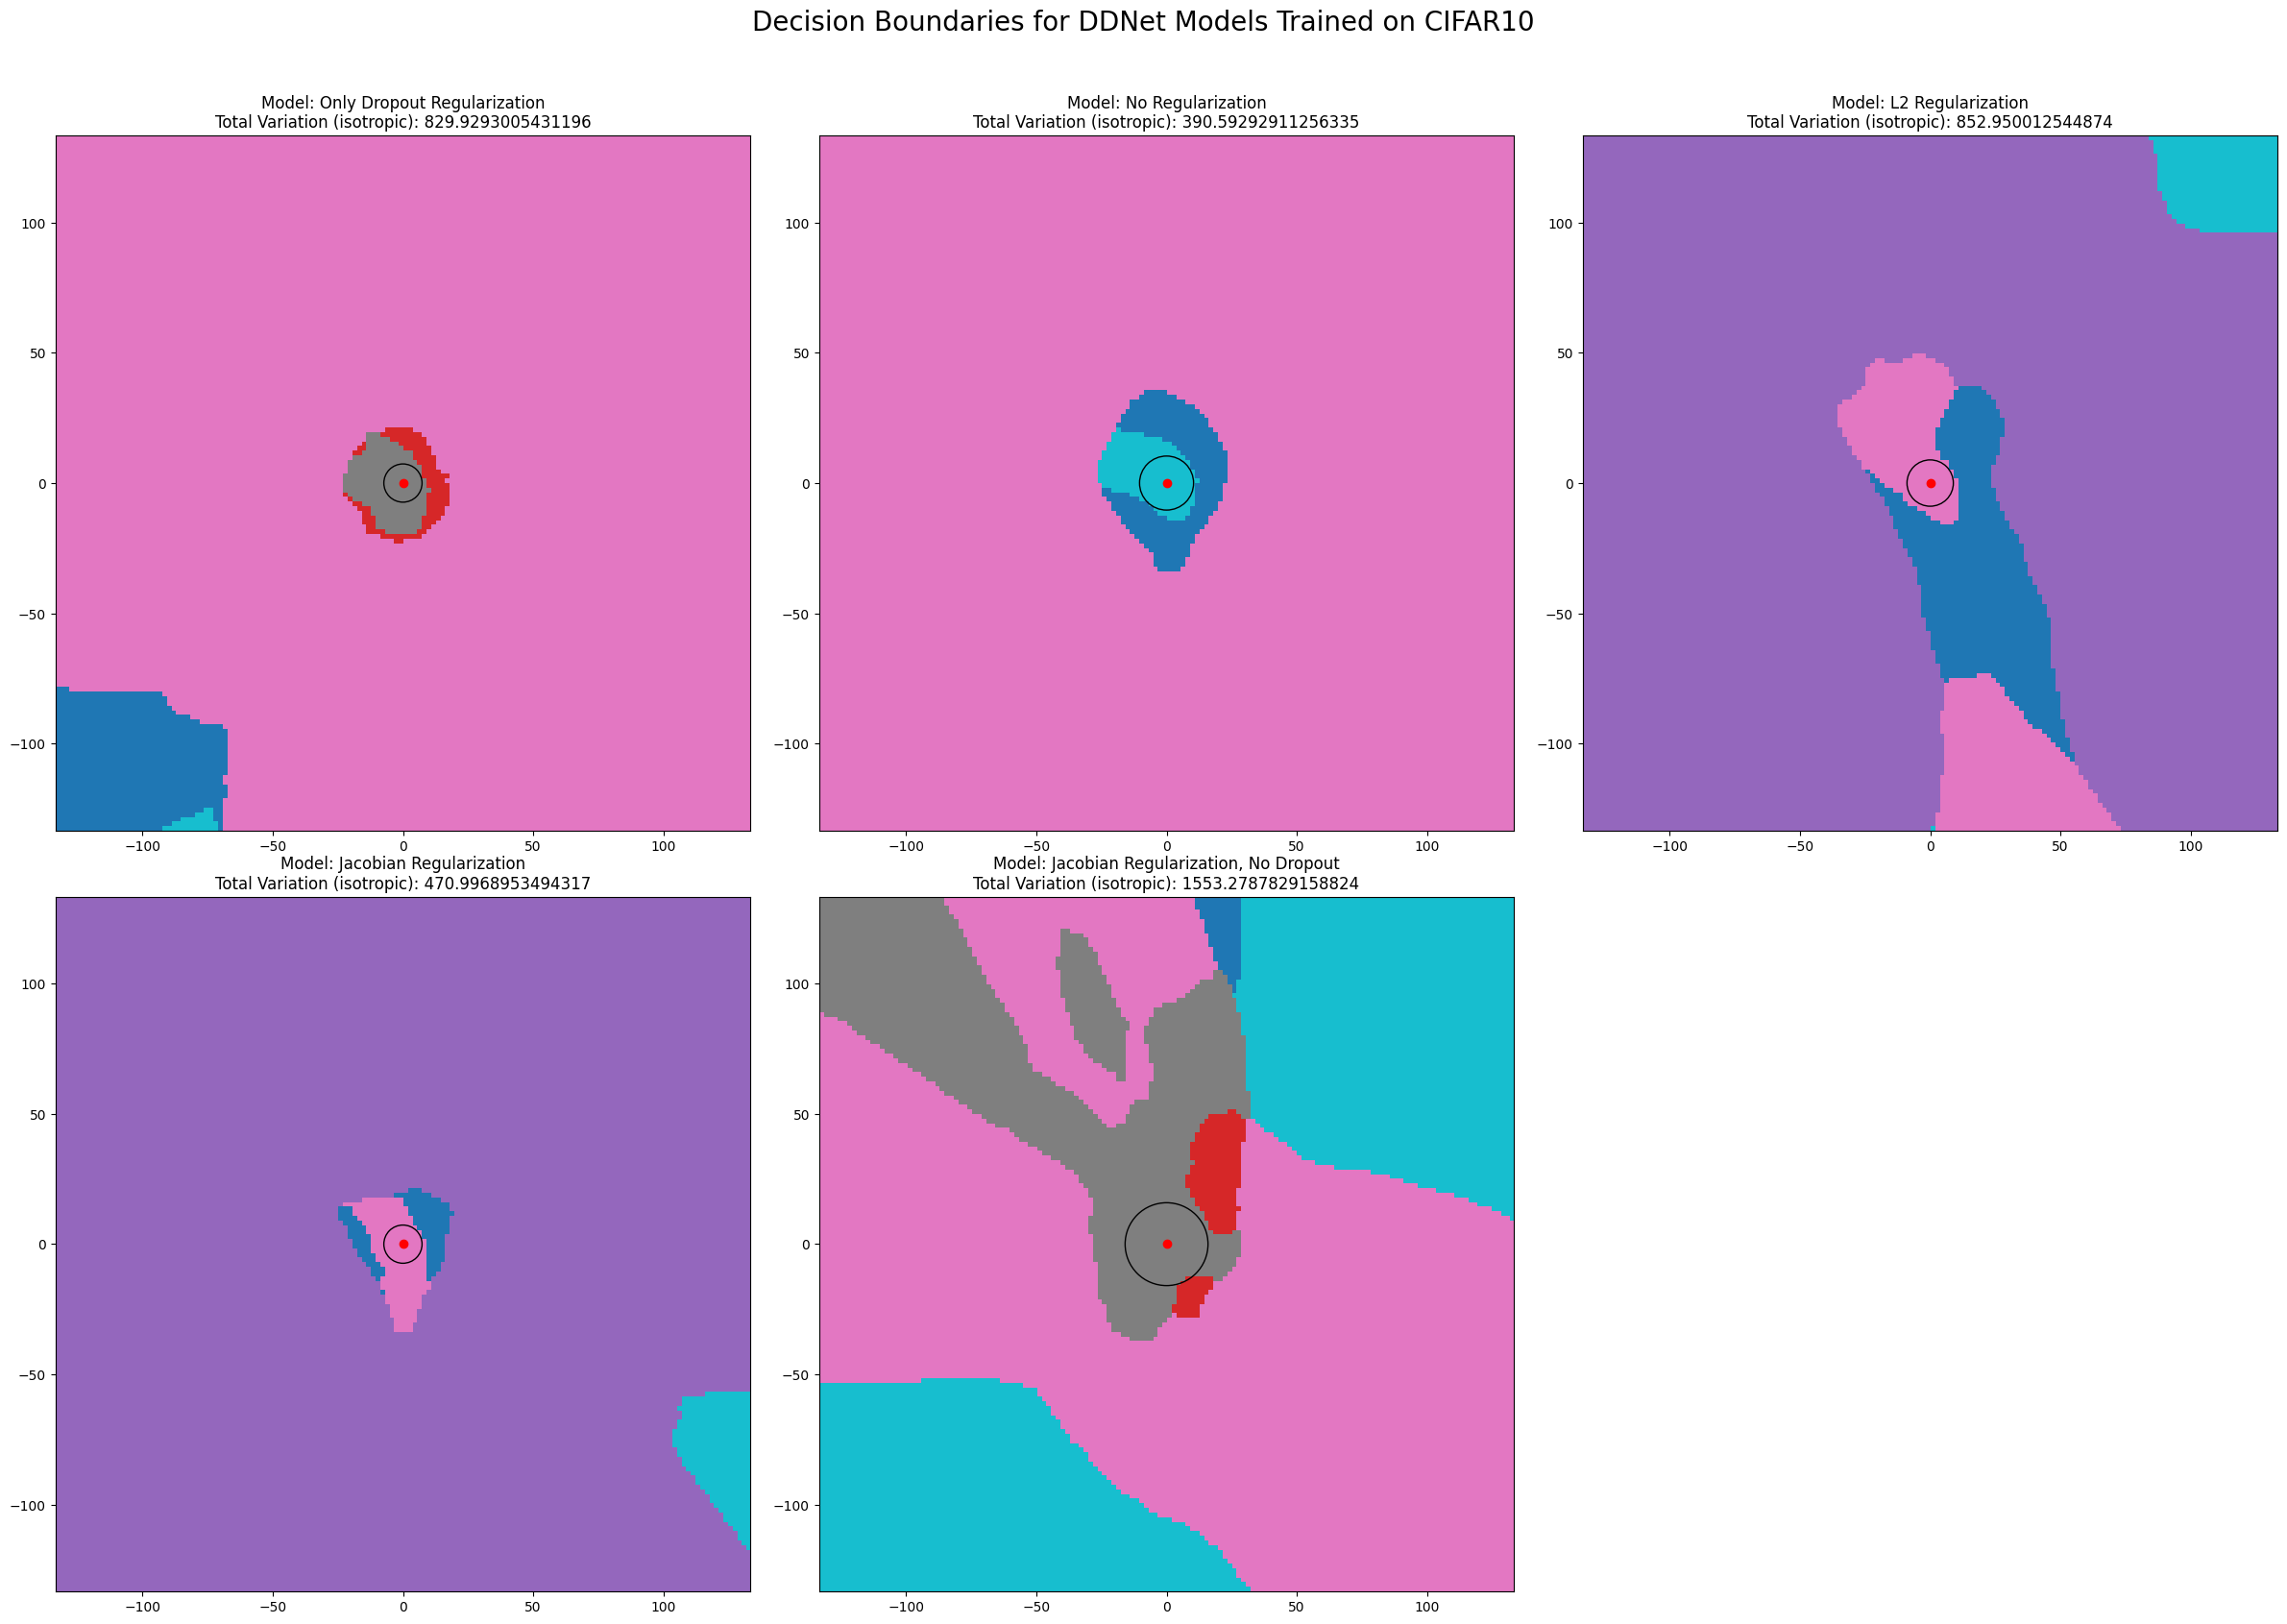

In [9]:
# Plot decision boundaries for CIFAR10/DDNet models
models_cifar10_with_names = [
    (models_CIFAR10[f"model_no_reg_2"].model, "Only Dropout Regularization"),
    (models_CIFAR10[f"model_no_reg_no_dropout_2"].model, "No Regularization"),
    (models_CIFAR10[f"model_l2_2"].model, "L2 Regularization"),
    (models_CIFAR10[f"model_jacobi_2"].model, "Jacobian Regularization"),
    (
        models_CIFAR10[f"model_jacobi_no_dropout_2"].model,
        "Jacobian Regularization, No Dropout",
    ),
    (models_CIFAR10[f"model_svb_2"].model, "SVB Regularization"),
]
image = get_random_img(test_loader_CIFAR10)
v1, v2 = generate_random_vectors(image)
plot_decision_boundaries_for_multiple_models(
    models_cifar10_with_names,
    "cifar10",
    image,
    v1,
    v2,
    device,
    resolution=150,
    # zoom = 0.01,
    zoom=0.0075,
    title="Decision Boundaries for DDNet Models Trained on CIFAR10",
)

4it [02:08, 32.20s/it]


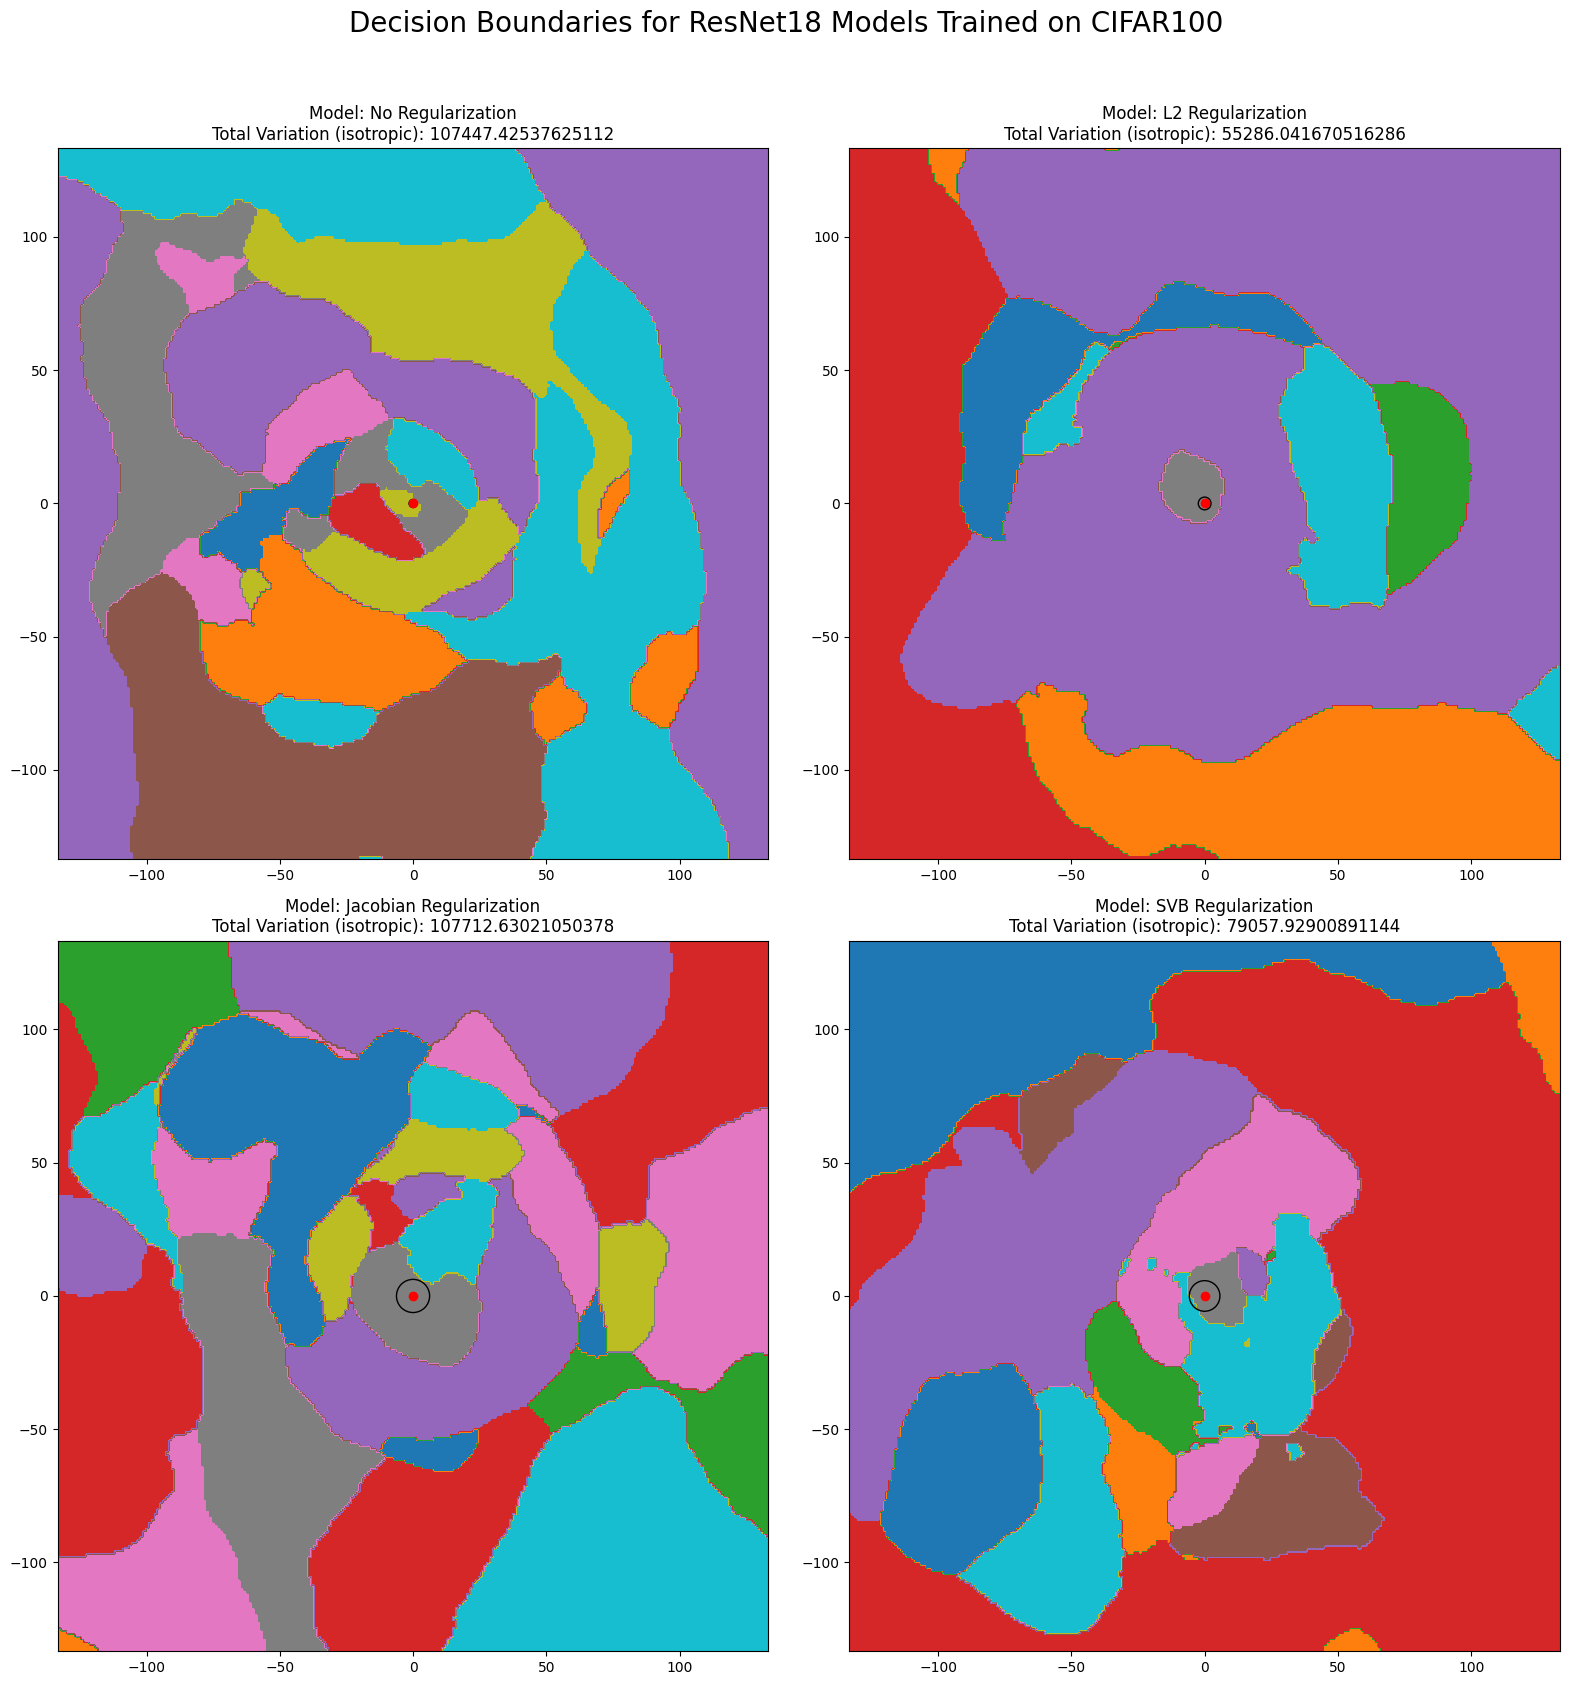

In [15]:
# Plot decision boundaries for CIFAR100/ResNet18 models
models_cifar100_with_names = [
    (models_CIFAR100[f"model_no_reg_2"].model, "No Regularization"),
    (models_CIFAR100[f"model_l2_2"].model, "L2 Regularization"),
    (models_CIFAR100[f"model_jacobi_2"].model, "Jacobian Regularization"),
    (models_CIFAR100[f"model_svb_2"].model, "SVB Regularization"),
]
image = get_random_img(test_loader_CIFAR100)
v1, v2 = generate_random_vectors(image)
plot_decision_boundaries_for_multiple_models(
    models_cifar100_with_names,
    "cifar100",
    image,
    v1,
    v2,
    device,
    resolution=250,
    # zoom=0.01,
    zoom=0.0075,
    title="Decision Boundaries for ResNet18 Models Trained on CIFAR100",
)